In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import os
import glob

from nfl import Team, Game, Play, Player

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
players = pd.read_csv('data/players.csv').set_index('nflId')

In [4]:
plays = pd.read_csv('data/plays.csv')

In [5]:
weeks = {}
for i in range(1):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join('data',name+'-processed.csv'))

In [6]:
team_names = games['homeTeamAbbr'].unique()

In [7]:
teams = {}
for name in team_names:
    teams[name] = Team(abbr=name)

In [8]:
for i in range(games.shape[0]):
    _game_info = games.loc[i]
    gameId = _game_info['gameId']
    homeTeamAbbr = _game_info['homeTeamAbbr']
    visitorTeamAbbr = _game_info['visitorTeamAbbr']
    week = _game_info['week']
    
    game_plays = plays[plays['gameId'] == gameId]
    home_game_plays = game_plays[game_plays['possessionTeam']==homeTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    away_game_plays = game_plays[game_plays['possessionTeam']==visitorTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    
    teams[homeTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=visitorTeamAbbr,game_info=_game_info,
                                                    play_data=away_game_plays,location='home')
    teams[visitorTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=homeTeamAbbr,game_info=_game_info,
                                                    play_data=home_game_plays,location='away')

In [9]:
team = teams['IND']

In [10]:
for key in ('week1',):
    game = team.games[key]
    
    week_data = weeks[key]
    
    for i in game.play_data.index:
        play = game.play_data.loc[i]
        tracking_data = week_data[(week_data['gameId']==play['gameId'])&(week_data['playId']==play['playId'])]
        player_tracking = tracking_data[tracking_data['nflId'].notna()]
        fb_tracking = tracking_data[tracking_data['displayName']=='Football'].sort_values(by='frameId').reset_index(drop=True)
        
        game.plays.append(Play(play['playId'],play_data=play,player_tracking=player_tracking,
                               fb_tracking=fb_tracking,defensive_team=game.location))

In [11]:
game = team.games['week1']

In [12]:
game.opponent

'CIN'

In [13]:
game.location

'home'

In [14]:
game.nPlays

32

In [15]:
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
play_number = 0

In [17]:
play = game.plays[play_number]

In [18]:
print(play)

(14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).


In [19]:
play.play_data

gameId                                                           2018090902
playId                                                                   81
playDescription           (14:11) (Shotgun) A.Dalton pass short left int...
quarter                                                                   1
down                                                                      2
yardsToGo                                                                 3
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            CIN
yardlineNumber                                                           37
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

In [20]:
play.process_players(players)

In [21]:
play.events

{'ball_snap': 11,
 'play_action': 24,
 'pass_forward': 40,
 'pass_arrived': 55,
 'pass_outcome_interception': 56,
 'first_contact': 94,
 'tackle': 100}

In [22]:
play.outcome_event

'pass_outcome_interception'

In [23]:
for key, value in play.players['offense'].items():
    if value.position == 'QB':
        qb_key = key

In [24]:
play.players['offense'][qb_key].name

'Andy Dalton'

In [25]:
play.players['offense'][qb_key].position

'QB'

In [26]:
state = play.players['offense'][qb_key].tracking_data[['x','y','s','a']]

In [27]:
play.players['offense'][qb_key].tracking_data['x'].values

array([41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.94, 41.94,
       41.95, 41.95, 41.95, 41.95, 41.96, 41.96, 41.97, 41.97, 41.96,
       41.96, 41.95, 41.96, 41.96, 41.92, 41.87, 41.78, 41.68, 41.56,
       41.4 , 41.22, 41.03, 40.82, 40.6 , 40.38, 40.16, 39.94, 39.7 ,
       39.46, 39.21, 38.93, 38.62, 38.3 , 37.96, 37.61, 37.23, 36.83,
       36.42, 36.  , 35.56, 35.12, 34.69, 34.27, 33.85, 33.44, 33.05,
       32.68, 32.32, 31.97, 31.63, 31.3 , 30.97, 30.65, 30.33, 30.  ,
       29.67, 29.33, 28.99, 28.63, 28.26, 27.87, 27.47, 27.06, 26.63,
       26.19, 25.75, 25.3 , 24.86, 24.41, 23.97, 23.53, 23.1 , 22.68,
       22.28, 21.88, 21.5 , 21.13, 20.78, 20.47, 20.18, 19.98, 19.84,
       19.73, 19.64, 19.58, 19.57, 19.55, 19.53, 19.51, 19.47, 19.44,
       19.4 , 19.36])

In [28]:
state.T

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
x,41.95,41.95,41.95,41.95,41.95,41.95,41.95,41.94,41.94,41.95,...,19.64,19.58,19.57,19.55,19.53,19.51,19.47,19.44,19.40,19.36
y,25.05,25.05,25.06,25.07,25.06,25.06,25.05,25.05,25.05,25.05,...,46.58,47.09,47.57,47.99,48.36,48.68,48.89,49.04,49.14,49.21
s,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.37,4.95,4.41,3.90,3.40,2.95,1.94,1.29,0.89,0.60
a,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.18,4.83,4.73,4.67,4.55,4.22,5.47,5.46,4.77,3.96


In [29]:
dt = .1

x = state['x'].values
y = state['y'].values

dx = np.zeros(len(x))
dy = np.zeros(len(y))

ddx = np.zeros(len(x))
ddy = np.zeros(len(y))

for i in range(1,state.shape[0]-1):
    dx[i] = (x[i+1] - x[i-1]) / (2 * dt)
    dy[i] = (y[i+1] - y[i-1]) / (2 * dt)
    
for i in range(2,state.shape[0]-2):
    ddx[i] = (dx[i+1] - dx[i-1]) / (2 * dt)
    ddy[i] = (dy[i+1] - dy[i-1]) / (2 * dt)
    
filt_dx = np.zeros(len(x))
filt_dy = np.zeros(len(y))

filt_ddx = np.zeros(len(x))
filt_ddy = np.zeros(len(y))
    
order = 3
kernal = np.ones(order) / order

w = order // 2
for i in range(w,state.shape[0]-2):
    filt_dx[i] = sum(dx[i-w:i+w+1]) / order
    filt_dy[i] = sum(dy[i-w:i+w+1]) / order
    
for i in range(w,state.shape[0]-2):
    filt_ddx[i] = sum(ddx[i-w:i+w+1]) / order
    filt_ddy[i] = sum(ddy[i-w:i+w+1]) / order

In [30]:
play.events

{'ball_snap': 11,
 'play_action': 24,
 'pass_forward': 40,
 'pass_arrived': 55,
 'pass_outcome_interception': 56,
 'first_contact': 94,
 'tackle': 100}

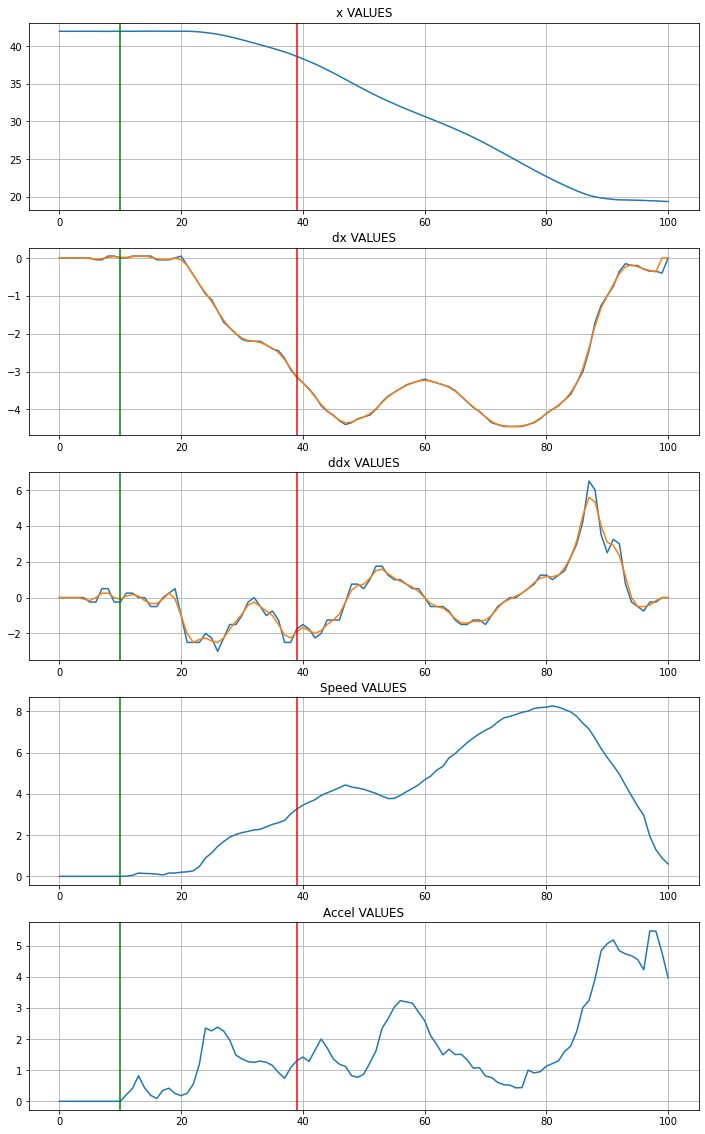

In [31]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(12,20))

ax1.set_title("x VALUES")
ax1.plot(x)

ax2.set_title("dx VALUES")
ax2.plot(dx)
ax2.plot(filt_dx)

ax3.set_title("ddx VALUES")
ax3.plot(ddx)
ax3.plot(filt_ddx)

ax4.set_title("Speed VALUES")
ax4.plot(state['s'].values)

ax5.set_title("Accel VALUES")
ax5.plot(state['a'].values)

for ax in (ax1,ax2,ax3,ax4,ax5):
    ax.grid()
    ax.axvline(play.events['ball_snap']-1,color='g')
    ax.axvline(play.events['pass_forward']-1,color='r')

plt.show()

In [32]:
start = play.events['ball_snap'] - 1
end = play.events['pass_forward']

In [33]:
peak_dropback = np.argmin(filt_dx[start:end]) + start
peak_dropback

39

In [34]:
start = peak_dropback
end = play.events['pass_forward']

In [35]:
end_dropback = np.argmax(filt_ddx[start:end]) + start
end_dropback

39

In [36]:
play.find_dropback_events()

In [37]:
play.events

{'ball_snap': 11,
 'play_action': 24,
 'pass_forward': 40,
 'pass_arrived': 55,
 'pass_outcome_interception': 56,
 'first_contact': 94,
 'tackle': 100,
 'peak_dropback': 40,
 'end_dropback': 40}